In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# NLTK 라이브러리의 불용어 목록
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# 불용어 리스트
stop_words = set(stopwords.words('english'))

# 텍스트 전처리 함수
def preprocess_text(text):
    # 소문자로 변환
    text = text.lower()
    # 특수 문자 제거
    text = re.sub(r'[^\w\s]', '', text)
    # 숫자 제거
    text = re.sub(r'\d+', '', text)
    # 토크나이징
    words = word_tokenize(text)
    # 불용어 제거
    words = [word for word in words if word not in stop_words]
    return words

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df['v2'] = df['v2'].apply(preprocess_text)

print(df.head())

     v1                                                 v2
0   ham  [go, jurong, point, crazy, available, bugis, n...
1   ham                     [ok, lar, joking, wif, u, oni]
2  spam  [free, entry, wkly, comp, win, fa, cup, final,...
3   ham      [u, dun, say, early, hor, u, c, already, say]
4   ham  [nah, dont, think, goes, usf, lives, around, t...


In [4]:
from gensim.models import Word2Vec

# Word2Vec 모델 학습
model_w2v = Word2Vec(sentences=df['v2'], vector_size=100, window=5, min_count=1, workers=4)

# 특정 단어의 벡터 확인
print(model_w2v.wv['free'])  # 'free' 단어의 벡터를 출력

[-0.13117366  0.41522422  0.13098224 -0.00851245 -0.04110312 -0.81361115
  0.18462339  1.0856259  -0.44631848 -0.42804283 -0.29195485 -0.6949229
 -0.16546498  0.13861364  0.23322275 -0.5544657   0.1440394  -0.5439401
  0.16576526 -0.9258286   0.33682385  0.25193068  0.48584563 -0.3145239
 -0.12500872  0.10153645 -0.42623335 -0.4014977  -0.42475367  0.10208458
  0.5869004  -0.00523466  0.19410363 -0.43242878 -0.13255948  0.60470283
 -0.02744318 -0.26208052 -0.28469744 -0.8446861   0.22777553 -0.43564254
 -0.20214225  0.07124544  0.3825388  -0.35636622 -0.38922977 -0.04748363
  0.33235615  0.20598528  0.26596108 -0.509939   -0.2608791  -0.20576744
 -0.5048534   0.26355124  0.26089582 -0.14197698 -0.56532705  0.23728451
  0.21938582  0.25183535 -0.19308576 -0.08097246 -0.47380793  0.4768567
  0.09902388  0.4128743  -0.7869683   0.66284937 -0.4150456   0.23984054
  0.6804428  -0.15834351  0.5136826   0.1974452  -0.00560818 -0.16878119
 -0.3838989   0.21754614 -0.33205503 -0.12988743 -0.520

In [6]:
# 모델 저장
model_w2v.save("word2vec.model")

In [7]:
# 유사도 측정
similarity = model_w2v.wv.similarity('spam', 'offer')
print(f"Similarity between 'spam' and 'offer': {similarity}")

Similarity between 'spam' and 'offer': 0.6108658909797668


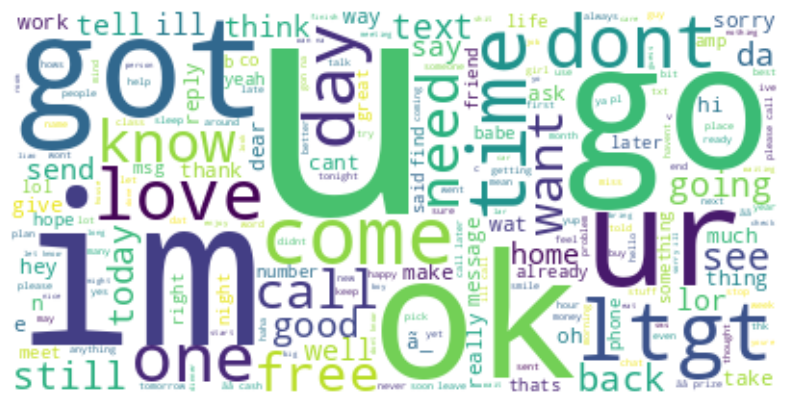

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 모든 텍스트를 하나의 문자열로 결합
text = " ".join([" ".join(words) for words in df['v2']])

# 워드 클라우드 생성
wordcloud = WordCloud(background_color='white').generate(text)

# 워드 클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
# 모델 학습
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# 텍스트 데이터를 벡터 형태로 변환
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['v2'].astype('str'))

# 레이블 인코딩
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})
y = df['v1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 이진 분류 모델 학습
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# 예측
y_pred = classifier.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9704035874439462
